# Graphs

In this notebook, you will practice using networkx to interact with a graph in Python.

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import community as community

import matplotlib.pyplot as plt
%matplotlib inline

#### Load the IMDB actors graph

Each actor in the IMDB database is a node. There is an edge between those two nodes if the actors have appeared in a movie together

In [2]:
G = nx.read_edgelist('data/actor_edges.tsv', delimiter='\t')

In [3]:
!head data/actor_edges.tsv

John Shea	Rachel Miner
Eddie Martinez	Ian Duncan
Concetta Tomei	Thea Gill
Ashley Brightwell	Ted Myre
Andre Royo	Julianna Gabert
Jessica Schwarz	Ramon Pujol
Danielle Kotch	Lorraine Aceves
Chantell D. Christopher	Tamela Mann
Alexis Arquette	Lochlyn Munro
Demi Petersen	Talon G. Ackerman


Total number of nodes (actors)

In [4]:
G.number_of_nodes()

80249

Total number of edges

In [5]:
G.number_of_edges()

1332443

Take a look at the notes and edges

In [6]:
G.nodes()[:15]

[u'Alex Zahara',
 u'Sam Saliba',
 u'Chellis Glendinning',
 u'Zamariah Zane Loupe',
 u'John Eatherly',
 u'John Dartt',
 u'Omid Djalili',
 u'Jacki Weaver',
 u'Kim LeBlanc',
 u'Dan Finnerty',
 u'Kyrrin Marshall',
 u'Negar Saberi',
 u'Barry Sigismondi',
 u'Richard Holden',
 u'Dale Mattison']

In [7]:
G.edges()[:15]

[(u'Alex Zahara', u'Valin Shinyei'),
 (u'Alex Zahara', u'Aleks Paunovic'),
 (u'Alex Zahara', u'Tiera Skovbye'),
 (u'Alex Zahara', u'Christa Campbell'),
 (u'Alex Zahara', u'Kansas Joe McCoy'),
 (u'Alex Zahara', u'Steph DuVall'),
 (u'Alex Zahara', u'Kaj-Erik Eriksen'),
 (u'Alex Zahara', u'Rio Alexander'),
 (u'Alex Zahara', u'Arron Shiver'),
 (u'Alex Zahara', u'Laine MacNeil'),
 (u'Alex Zahara', u'Mark McConchie'),
 (u'Alex Zahara', u'Andee Frizzell'),
 (u'Alex Zahara', u'Paralee Cook'),
 (u'Alex Zahara', u'William McDonald'),
 (u'Alex Zahara', u'Stacey Travis')]

Neighborhood of John Goodman

In [8]:
len(nx.neighbors(G, 'John Goodman'))

550

Shortest path between two actors

In [9]:
nx.shortest_path(G, 'John Goodman', 'Paul Rudd')

['John Goodman', u'Alex Borstein', 'Paul Rudd']

All of the shortest paths

In [10]:
paths = nx.shortest_paths.all_shortest_paths(G, 'John Goodman', 'Paul Rudd')

for path in paths:
    print path

['John Goodman', u'Alex Borstein', 'Paul Rudd']
['John Goodman', u'Seann William Scott', 'Paul Rudd']
['John Goodman', u'Zach Galifianakis', 'Paul Rudd']
['John Goodman', u'Justin Long', 'Paul Rudd']
['John Goodman', u'Tracey Ullman', 'Paul Rudd']
['John Goodman', u'Owen Wilson', 'Paul Rudd']
['John Goodman', u'Fred Armisen', 'Paul Rudd']
['John Goodman', u'Ron Silver', 'Paul Rudd']
['John Goodman', u'Rhoda Griffis', 'Paul Rudd']
['John Goodman', u'Nicholas Braun', 'Paul Rudd']
['John Goodman', u'Johnny Simmons', 'Paul Rudd']
['John Goodman', u'Octavia Spencer', 'Paul Rudd']
['John Goodman', u'Steve Carell', 'Paul Rudd']
['John Goodman', u'Ren?e Zellweger', 'Paul Rudd']
['John Goodman', u'Joan Cusack', 'Paul Rudd']
['John Goodman', u'Lauren Graham', 'Paul Rudd']
['John Goodman', u'Emile Hirsch', 'Paul Rudd']
['John Goodman', u'Ray Liotta', 'Paul Rudd']
['John Goodman', u'Ken Jeong', 'Paul Rudd']
['John Goodman', u'Hugh Dancy', 'Paul Rudd']
['John Goodman', u'Bruce Greenwood', 'Paul Rud

#### Exercise

Make a histogram of the degree distribution of this graph. Does it match any of the distributions discussed in the async?

(array([  1.02500000e+03,   2.60000000e+01,   5.00000000e+00,
          6.00000000e+00,   3.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([    0.,   586.,  1172.,  1758.,  2344.,  2930.,  3516.,  4102.,
         4688.,  5274.,  5860.]),
 <a list of 10 Patch objects>)

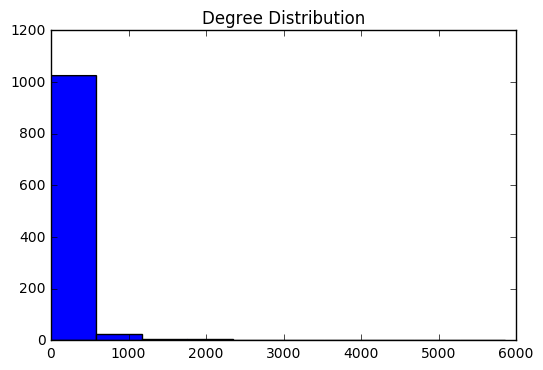

In [11]:
hist_data = nx.degree_histogram(G)

plt.title("Degree Distribution")
plt.hist(hist_data)

#### Exercise

Which actor has the highest degree centrality?

In [12]:
degree_centralities = pd.Series(nx.degree_centrality(G))

degree_centralities.head()

degree_centralities = degree_centralities.sort_values(ascending = False)

degree_centralities.head()


Danny Trejo       0.013296
Richard Riehle    0.010330
Keith David       0.010131
Tom Arnold        0.009957
Eric Roberts      0.009682
dtype: float64

#### Exercise

How many connected components are there?

In [13]:
nx.number_connected_components(G)

1390

#### Exercise

Make a histogram of the sizes of the connected components. (Try removing the first component for better results)

(array([ 407.,    0.,  264.,    0.,  179.,    0.,  159.,    0.,    0.,
          81.,    0.,   57.,    0.,   48.,    0.,   40.,    0.,    0.,
          47.,    0.,   18.,    0.,   24.,    0.,    0.,    8.,    0.,
          12.,    0.,   22.,    0.,    2.,    0.,    0.,    2.,    0.,
           3.,    0.,    1.,    0.,    4.,    0.,    0.,    2.,    0.,
           1.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.,    0.,    0.,    1.,    0.,    1.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           2.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  2.  ,   2.44,   2.88,   3.32,   3.76,   4.2 ,   4.64,   5.08,
          5.52,   5.96,   6.4 ,   6.84,   7.28,   7.72,   8.16,   8.6 ,
          9.04,   9.48,   9.92,  10.36,  10.8 ,  11.24,  11.68,  1

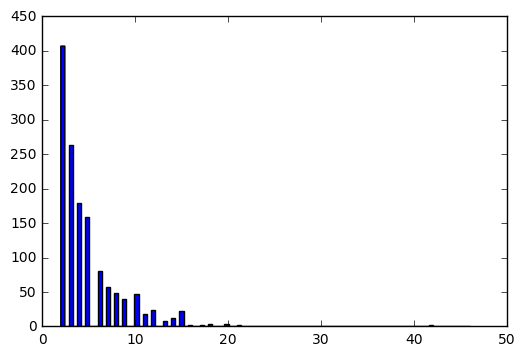

In [14]:
connected_components = nx.connected_components(G)

sizes = []

for item in connected_components:
    sizes.append(len(item))
    
sizes = np.sort(sizes)

sizes = sizes[:-1]
    
plt.hist(sizes, bins=100)
    

    

    



For the remainder of the problems, work with a subset of the original graph

In [15]:
smallG = nx.read_edgelist('data/small_actor_edges.tsv', delimiter='\t')

In [16]:
smallG.number_of_edges()

6433

In [17]:
smallG.number_of_nodes()

357

#### Exercise

How many connected components are there in this graph?

In [18]:
nx.number_connected_components(smallG)

1

#### Exercise

Find the most important actor in this subgroup according to each of the following centrality measures:
- Degree
- Betweenness
- Eigenvector
- Pagerank

In [19]:
degree_centralities = pd.Series(nx.degree_centrality(smallG))

degree_centralities.head()

degree_centralities = degree_centralities.sort_values(ascending = False)

degree_centralities.head()

#using degree centrality David Koechner is the most important

David Koechner    0.255618
Justin Long       0.250000
Danny Trejo       0.224719
Paul Rudd         0.216292
Jason Bateman     0.207865
dtype: float64

In [20]:
betweenness_centralities = pd.Series(nx.betweenness_centrality(smallG))

betweenness_centralities.head()

betweenness_centralities = betweenness_centralities.sort_values(ascending = False)

betweenness_centralities.head()

#using betweeness centrality Danny Trejo is the most important

Danny Trejo          0.017406
Justin Long          0.012436
David Koechner       0.011794
John Goodman         0.011655
Samuel L. Jackson    0.010877
dtype: float64

In [21]:
eigenvector_centralities = pd.Series(nx.eigenvector_centrality(smallG))

eigenvector_centralities.head()

eigenvector_centralities = eigenvector_centralities.sort_values(ascending = False)

eigenvector_centralities.head()

#using eigenvector centrality David Koechner is the most important

David Koechner    0.140463
Justin Long       0.131153
Paul Rudd         0.128405
Will Ferrell      0.125544
Seth Rogen        0.116515
dtype: float64

In [22]:
pagerank_centralities = pd.Series(nx.pagerank(smallG))

pagerank_centralities.head()

pagerank_centralities = pagerank_centralities.sort_values(ascending = False)

pagerank_centralities.head()

#using pagerank David Koechner is the most important

David Koechner       0.006230
Justin Long          0.006138
Danny Trejo          0.005912
Paul Rudd            0.005276
Samuel L. Jackson    0.005173
dtype: float64

#### Exercise

Compare the ranks of some of the top actors. That is, make a table with one row for each actor and one column for each centrality measure. The values should be the relative rank of the each actor according to that centrality measure. Hint: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.rank.html

In [39]:
#for series in [degree_centralities,betweenness_centralities,eigenvector_centralities,pagerank_centralities]:
#    series = series.rank(axis = 1)

combined_ranks = pd.concat([degree_centralities,betweenness_centralities,eigenvector_centralities,pagerank_centralities], axis = 1)

combined_ranks.columns = ['degree', 'betweenness', 'eigenvector', 'pagerank']

#create rank columns
combined_ranks['degree_rank'] = combined_ranks.degree.rank(ascending = False)
combined_ranks['betweenness_rank'] = combined_ranks.betweenness.rank(ascending = False)
combined_ranks['eigenvector_rank'] = combined_ranks.eigenvector.rank(ascending = False)
combined_ranks['pagerank_rank'] = combined_ranks.pagerank.rank(ascending = False)

combined_ranks = combined_ranks.sort_values(by = 'degree_rank', ascending = True)

combined_ranks.head()

,degree,betweenness,eigenvector,pagerank,degree_rank,betweenness_rank,eigenvector_rank,pagerank_rank
David Koechner,0.255618,0.011794,0.140463,0.006230,1.0,3.0,1.0,1.0
Justin Long,0.250000,0.012436,0.131153,0.006138,2.0,2.0,2.0,2.0
Danny Trejo,0.224719,0.017406,0.090261,0.005912,3.0,1.0,31.0,3.0
Paul Rudd,0.216292,0.006772,0.128405,0.005276,4.0,24.0,3.0,4.0
Jason Bateman,0.207865,0.008068,0.111257,0.005161,5.5,14.0,7.0,6.0


#### Exercise

Community detection is like clustering for graphs. There's lots of approaches, and we won't go into the details here. 

One good approach seems to be the [Louvain Method](https://www.quora.com/Is-there-a-simple-explanation-of-the-Louvain-Method-of-community-detection). It is implemented in the [community](https://github.com/taynaud/python-louvain) package in Python.

Once you get it installed, try using the `best_partition` method to apply the Louvain Method for community detection


In [41]:
#to install
#pip install python-louvain

community_clusters = pd.Series(community.best_partition(smallG))

#merge onto earlier DF
column_names = combined_ranks.columns.tolist()

combined_ranks = pd.concat([combined_ranks, community_clusters], axis = 1)

combined_ranks.columns = column_names + ['cluster']

combined_ranks.head()


,degree,betweenness,eigenvector,pagerank,degree_rank,betweenness_rank,eigenvector_rank,pagerank_rank,cluster
50 Cent,0.084270,0.001284,0.033677,0.002394,228.0,268.0,231.0,232.0,1
Aasif Mandvi,0.103933,0.002004,0.054523,0.002790,154.0,201.0,104.0,164.0,3
Adam LeFevre,0.089888,0.001720,0.041286,0.002503,210.0,232.0,180.0,217.0,3
Adam Scott,0.123596,0.001804,0.075423,0.003167,94.0,222.0,52.0,117.0,3
Aidan Quinn,0.058989,0.001159,0.021864,0.001865,299.0,276.0,295.0,299.0,0


#### Exercise

See if you can find the most important actors in each community. Do you recognize any of the communities?

Hint: Use nx.subgraph to create a sub-graph from each community

#### Exercise

Pick one of the communities you found above and plot the network using the code below

In [ ]:
plt.figure(figsize=(12,12))

# Pick a node layout
# node_position = nx.fruchterman_reingold_layout(subG)
# node_position = nx.spring_layout(subG)
node_position = nx.random_layout(subG)
# node_position = nx.circular_layout(subG)
# node_position = nx.spectral_layout(subG)
# node_position = nx.shell_layout(subG)

nx.draw_networkx_nodes(subG, node_position, node_size=100, alpha=.8)
nx.draw_networkx_edges(subG, node_position, alpha=.1)
nx.draw_networkx_labels(subG, node_position)

plt.show()

You can experiment with the node layouts, but none of them are really satisfactory. A better approach is to use a graph visualization tool like [gephi](https://gephi.org/)

In [ ]:
nx.write_gml(subG, 'my_community.gml')

Here's a few steps to get started

1. Open the gml file in gephi
2. Use the Layout tab and choose Force Atlas as the layout. Adjust the repulsion strength until the nodes are sufficiently spread apart. More densely connected nodes should be near the center.
3. Add the labels by clicking the T in the lower left hand corner.
4. Use the statistics tab to calculate eigenvector centrality, pagerank, and anything else you're interested in.
5. Use the appearance tab to scale the text color/size according to various centrality measures.
6. Keep experimenting!

#### Extra Credit

How many actors are connected to Kevin Bacon, but by more than six degrees?

In [ ]:
G = nx.read_edgelist('data/actor_edges.tsv', delimiter='\t')